In [1]:
import torch
import torchvision.transforms as T
from PIL import Image
from torchvision.utils import make_grid
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot  as plt
import torchvision
from torch.autograd import Variable

In [51]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
train_dataset_path = './DATA/Blur'
test_dataset_path = './DATA/Main_image'

In [3]:
transformer = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((250, 250)),
    transforms.Normalize([0.5, 0.5, 0.5] , [0.5, 0.5, 0.5])
])

In [4]:
train_dataloader = DataLoader(
    torchvision.datasets.ImageFolder(train_dataset_path, transform = transformer),
    batch_size = 100,
    shuffle= True
)

test_dataloader = DataLoader(
    torchvision.datasets.ImageFolder(test_dataset_path, transform = transformer),
    batch_size = 100,
    shuffle= True
)

torch.Size([100, 3, 250, 250]) torch.Size([100])


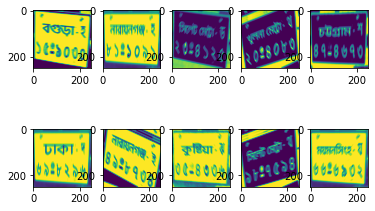

In [5]:
example = iter(train_dataloader)
samples, labels = example.next()
print(samples.shape, labels.shape)
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(samples[i][0])
plt.show()
print(len(train_dataloader))

81
torch.Size([100, 3, 250, 250]) torch.Size([100])


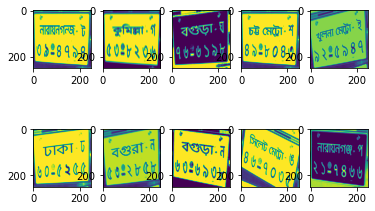

11


In [6]:
example = iter(test_dataloader)
samples, labels = example.next()
print(samples.shape, labels.shape)
for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(samples[i][0])
plt.show()
print(len(test_dataloader))

In [7]:
# mnist_data = torchvision.datasets.MNIST(root='/Mnist', train=True, download=True)

In [8]:
tensor_to_img = transforms.ToPILImage()

In [9]:
for (img, _) in test_dataloader:
#     image=tensor_to_img(img)
#     image.show()
    print(img.shape)
    break

torch.Size([100, 3, 250, 250])


In [48]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        self.conv1= torch.nn.Conv2d(in_channels=3, out_channels=16,kernel_size= 3, stride=2, padding=1), # -> N, 16, 125, 125
        self.relu1 = torch.nn.ReLU(),
        self.maxpool1 = torch.nn.MaxPool2d(kernel_size=3, stride=1,padding=1),
            
        self.conv2= torch.nn.Conv2d(in_channels= 16, out_channels= 32, kernel_size=5, stride=2, padding=1), # -> N, 32, 62, 62
        self.relu2 = torch.nn.ReLU(),
        self.maxpool2 = torch.nn.MaxPool2d(kernel_size=3, stride=1,padding=1),
            
        self.conv3= torch.nn.Conv2d(in_channels= 32,out_channels= 64, kernel_size=3, stride=2, padding=1), # -> N, 64, 28, 28
        self.relu3 = torch.nn.ReLU(),
        self.maxpool3 = torch.nn.MaxPool2d(kernel_size=3, stride=1,padding=1),
            
        self.conv4= torch.nn.Conv2d(in_channels= 64,out_channels= 128, kernel_size=3, stride=2, padding=1), # -> N, 64, 14, 14
        self.relu4 = torch.nn.ReLU(),
        self.maxpool4 = torch.nn.MaxPool2d(kernel_size=3, stride=2,padding=1),  # -> N, 128, 7, 7
            
        self.conv5= torch.nn.Conv2d(in_channels= 128,out_channels= 256, kernel_size=7, stride=1, padding=0), # -> N, 256, 1, 1   
        
        self.convT1 = torch.nn.ConvTranspose2d(in_channels= 256,out_channels= 128, kernel_size=7, stride=1, padding=0), # -> N, 32, 7, 7
        self.relu5 = torch.nn.ReLU(),
        self.maxunpool1 = torch.nn.MaxUnpool2d(kernel_size=3, stride=2,padding=1),
            
        self.convT2 = torch.nn.ConvTranspose2d(in_channels= 128,out_channels= 64, kernel_size=3, stride=2, padding=1, output_padding=1), # -> N, 32, 7, 7
        self.relu6 = torch.nn.ReLU(),
        self.maxunpool2 = torch.nn.MaxUnpool2d(kernel_size=3, stride=1,padding=1),
            
        self.convT3 = torch.nn.ConvTranspose2d(in_channels= 64,out_channels= 32, kernel_size=3, stride=2, padding=1, output_padding=1), # -> N, 32, 7, 7
        self.relu7 = torch.nn.ReLU(),
        self.maxunpool3 = torch.nn.MaxUnpool2d(kernel_size=3, stride=1,padding=1),
            
        self.convT4 = torch.nn.ConvTranspose2d(in_channels= 32,out_channels= 16, kernel_size=5, stride=2, padding=1, output_padding=1), # -> N, 32, 7, 7
        self.relu8 = torch.nn.ReLU(),
        self.maxunpool4 = torch.nn.MaxUnpool2d(kernel_size=3, stride=1,padding=1),
            
        self.convT5 = torch.nn.ConvTranspose2d(in_channels= 16,out_channels= 3, kernel_size= 3, stride=2, padding=1, output_padding=1), # -> N, 32, 7, 7
#             torch.nn.ReLU(),
#             torch.nn.MaxUnpool2d(kernel_size=3, stride=2,padding=1),
            
#             torch.nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 14, 14 (N,16,13,13 without output_padding)
#             torch.nn.MaxUnpool2d(),
#             torch.nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # N, 1, 28, 28  (N,1,27,27)
        self.sigm = torch.nn.Sigmoid()
        

    def forward(self, x):
        out = self.conv1(x)
        print(out.shape)
        out = self.relu1(out)
        out = self.maxpool1(out)
        
        out = self.conv2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)
        
        out = self.conv3(out)
        out = self.relu3(out)
        out = self.maxpool3(out)
        
        out = self.conv4(out)
        out = self.relu4(out)
        out = self.maxpool4(out)
        
        out = self.conv5(out)
        
        out = self.convT1(out)
        out = self.relu5(out)
        out = self.maxunpool1(out)
        
        out = self.convT2(out)
        out = self.relu6(out)
        out = self.maxunpool2(out)
        
        out = self.convT3(out)
        out = self.relu7(out)
        out = self.maxunpool3(out)
        
        out = self.convT4(out)
        out = self.relu8(out)
        out = self.maxunpool4(out)
        
        out = self.convT5(out)
        out = self.sigmg(out)
        
        
        return out

In [57]:
model = Autoencoder().to(device)
print(list(model.parameters()))
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

[]


ValueError: optimizer got an empty parameter list

TypeError: Invalid shape () for image data

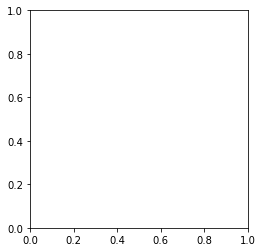

In [59]:
num_epochs = 1
outputs = []
for epoch in range(num_epochs):
    for (img, _) in enumerate(train_dataloader):
        # img = img.reshape(-1, 28*28) # -> use for Autoencoder_Linear
        plt.imshow(img)
        recon = model(img)
        loss = criterion(recon, img)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))